In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from pprint import pprint as pp

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from collections import Counter
from imblearn.over_sampling import SMOTENC
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours

# OBJECTIVE
- get familiar with `imblearn` to address class imbalance
- preliminary work to incorporating `imblearn` in `pycaret` processing pipeline

# CONTENTS
### preamble
### read wrangled data from pickle
### function to build feature columns list
### function to get target name from target integer value
### train-test split
### `imbalanced_learn` investigation methods
### try with `df_data_to_use`
- oversample only
- oversample and clean
- plot target distributions
- plot increase factor   
   
### try with only small classes

# preamble
### logical to control dataset sizes for modeling
##### `True` gives very small train and test set sizes for developing and debugging notebook
##### `False` splits entire dataset into train and test

In [7]:
use_small_data_set = True
#use_small_data_set = False

### pickle file name

In [8]:
running_on_local_machine = True
#running_on_local_machine = False

if running_on_local_machine:
    pickle_file_name = 'data/wrangled_data_update_soil.pkl'
else:
    pickle_file_name = '/storage/wrangled_data_update_soil.pkl'

# read wrangled data from pickle

In [9]:
df_data = pd.read_pickle(pickle_file_name)

In [10]:
df_data.shape
df_data.columns
df_data.head()

(581012, 71)

Index(['elevation', 'aspect', 'slope', 'HD_hydrology', 'VD_hydrology',
       'HD_roadways', 'hillshade_9am', 'hillshade_noon', 'hillshade_3pm',
       'HD_fire_points', 'wild_area_rawah', 'wild_area_neota',
       'wild_area_comanche_peak', 'wild_area_cache_la_poudre', 'soil_type_1',
       'soil_type_2', 'soil_type_3', 'soil_type_4', 'soil_type_5',
       'soil_type_6', 'soil_type_7', 'soil_type_8', 'soil_type_9',
       'soil_type_10', 'soil_type_11', 'soil_type_12', 'soil_type_13',
       'soil_type_14', 'soil_type_15', 'soil_type_16', 'soil_type_17',
       'soil_type_18', 'soil_type_19', 'soil_type_20', 'soil_type_21',
       'soil_type_22', 'soil_type_23', 'soil_type_24', 'soil_type_25',
       'soil_type_26', 'soil_type_27', 'soil_type_28', 'soil_type_29',
       'soil_type_30', 'soil_type_31', 'soil_type_32', 'soil_type_33',
       'soil_type_34', 'soil_type_35', 'soil_type_36', 'soil_type_37',
       'soil_type_38', 'soil_type_39', 'soil_type_40', 'cover_type',
       'wilder

,elevation,aspect,slope,HD_hydrology,VD_hydrology,HD_roadways,hillshade_9am,hillshade_noon,hillshade_3pm,HD_fire_points,...,mms_elevation,mms_aspect,mms_slope,mms_HD_hydrology,mms_VD_hydrology,mms_HD_roadways,mms_hillshade_9am,mms_hillshade_noon,mms_hillshade_3pm,mms_HD_fire_points
0,2596,51,3,258,0,510,221,232,148,6279,...,0.368684,0.141667,0.045455,0.184681,0.223514,0.071659,0.870079,0.913386,0.582677,0.875366
1,2590,56,2,212,-6,390,220,235,151,6225,...,0.365683,0.155556,0.030303,0.151754,0.215762,0.054798,0.866142,0.925197,0.594488,0.867838
2,2804,139,9,268,65,3180,234,238,135,6121,...,0.472736,0.386111,0.136364,0.191840,0.307494,0.446817,0.921260,0.937008,0.531496,0.853339
3,2785,155,18,242,118,3090,238,238,122,6211,...,0.463232,0.430556,0.272727,0.173228,0.375969,0.434172,0.937008,0.937008,0.480315,0.865886
4,2595,45,2,153,-1,391,220,234,150,6172,...,0.368184,0.125000,0.030303,0.109520,0.222222,0.054939,0.866142,0.921260,0.590551,0.860449


### define lists of column names

In [11]:
column = 'wild_area_'
areas = ['rawah', 'neota', 'comanche_peak', 'cache_la_poudre']
wild_area_cols = []
for i in areas:
    wild_area_cols.append(column + i)

column = 'soil_type_'
soil_type_cols = []
for i in range(1,41):
    soil_type_cols.append(column + str(i))

numerical_cols = ['elevation', 'aspect', 'slope', 'HD_hydrology', 'VD_hydrology', 'HD_roadways',
                  'hillshade_9am', 'hillshade_noon', 'hillshade_3pm', 'HD_fire_points']

scaled_numerical_cols = []
for col in numerical_cols:
    scaled_numerical_cols.append('mms_' + col)

target_col = ['cover_type']

target_names = ['spruce_fir', 'lodgepole_pine', 'ponderosa_pine', 'cottonwood_willow', 'aspen', 'douglas_fir', 'krummholz']

reverse_one_hot_cols = ['wilderness_index', 'wilderness_area', 'soil_index']

soil_cluster_cols = ['climatic_zone', 'geologic_zone', 'both_zones']

print('numerical_cols:')
pp(numerical_cols)

print('\nscaled_numerical_cols:')
pp(scaled_numerical_cols)

print('\nwild_area_cols:')
pp(wild_area_cols)

print('\nsoil_type_cols:')
pp(soil_type_cols)

print('\nsoil_cluster_cols:')
pp(soil_cluster_cols)

print('\nreverse_one_hot_cols:')
pp(reverse_one_hot_cols)

print('\ntarget_col:')
pp(target_col)

print('\ntarget_names:')
pp(target_names)

numerical_cols:
['elevation',
 'aspect',
 'slope',
 'HD_hydrology',
 'VD_hydrology',
 'HD_roadways',
 'hillshade_9am',
 'hillshade_noon',
 'hillshade_3pm',
 'HD_fire_points']

scaled_numerical_cols:
['mms_elevation',
 'mms_aspect',
 'mms_slope',
 'mms_HD_hydrology',
 'mms_VD_hydrology',
 'mms_HD_roadways',
 'mms_hillshade_9am',
 'mms_hillshade_noon',
 'mms_hillshade_3pm',
 'mms_HD_fire_points']

wild_area_cols:
['wild_area_rawah',
 'wild_area_neota',
 'wild_area_comanche_peak',
 'wild_area_cache_la_poudre']

soil_type_cols:
['soil_type_1',
 'soil_type_2',
 'soil_type_3',
 'soil_type_4',
 'soil_type_5',
 'soil_type_6',
 'soil_type_7',
 'soil_type_8',
 'soil_type_9',
 'soil_type_10',
 'soil_type_11',
 'soil_type_12',
 'soil_type_13',
 'soil_type_14',
 'soil_type_15',
 'soil_type_16',
 'soil_type_17',
 'soil_type_18',
 'soil_type_19',
 'soil_type_20',
 'soil_type_21',
 'soil_type_22',
 'soil_type_23',
 'soil_type_24',
 'soil_type_25',
 'soil_type_26',
 'soil_type_27',
 'soil_type_28',
 's

In [12]:
len(df_data.columns)

71

In [13]:
len(numerical_cols + scaled_numerical_cols + wild_area_cols
    + soil_type_cols + reverse_one_hot_cols + target_col + soil_cluster_cols)

71

# function to build feature columns list

In [14]:
def make_feature_columns_list(numerical_scaled, wild_area_one_hot, soil_type_one_hot, soil_type_cluster='none'):
    feature_cols_list = []
    
    if numerical_scaled:
        feature_cols_list += scaled_numerical_cols
    else:
        feature_cols_list += numerical_cols
    
    if wild_area_one_hot:
        feature_cols_list += wild_area_cols
    else:
        feature_cols_list.append(reverse_one_hot_cols[0])
    
    if soil_type_one_hot:
        feature_cols_list += soil_type_cols
    elif soil_type_cluster=='none':
        feature_cols_list.append(reverse_one_hot_cols[2])
    elif soil_type_cluster=='climatic':
        feature_cols_list.append(soil_cluster_cols[0])
    elif soil_type_cluster=='geologic':
        feature_cols_list.append(soil_cluster_cols[1])
    elif soil_type_cluster=='both':
        feature_cols_list.append(soil_cluster_cols[2])
    else:
        print('ERROR ERROR ERROR ERROR in selection of soil type columns')
    
    return feature_cols_list

In [15]:
temp_list = make_feature_columns_list(numerical_scaled=True, wild_area_one_hot=False,
                                      soil_type_one_hot=False, soil_type_cluster='both')
pp(temp_list)

['mms_elevation',
 'mms_aspect',
 'mms_slope',
 'mms_HD_hydrology',
 'mms_VD_hydrology',
 'mms_HD_roadways',
 'mms_hillshade_9am',
 'mms_hillshade_noon',
 'mms_hillshade_3pm',
 'mms_HD_fire_points',
 'wilderness_index',
 'both_zones']


# function to get target name from target integer value

In [16]:
get_target_name_from_integer = lambda i : target_names[i-1]
get_target_name_from_integer(2)

'lodgepole_pine'

# train-test split

In [17]:
feature_cols_to_use = make_feature_columns_list(numerical_scaled=True, wild_area_one_hot=False,
                                                soil_type_one_hot=False, soil_type_cluster='none')
feature_cols_to_use

['mms_elevation',
 'mms_aspect',
 'mms_slope',
 'mms_HD_hydrology',
 'mms_VD_hydrology',
 'mms_HD_roadways',
 'mms_hillshade_9am',
 'mms_hillshade_noon',
 'mms_hillshade_3pm',
 'mms_HD_fire_points',
 'wilderness_index',
 'soil_index']

In [18]:
if use_small_data_set:
    train_sample_size = 10000
    test_sample_size  = 3000

    X_train, X_test, y_train, y_test = train_test_split(df_data[feature_cols_to_use], df_data[target_col[0]],
                                       train_size=train_sample_size, test_size=test_sample_size, random_state=59)

else:
    X_train, X_test, y_train, y_test = train_test_split(df_data[feature_cols_to_use], df_data[target_col[0]],
                                       train_size=0.7, random_state=59)
    

In [19]:
X_train.shape
X_test.shape

(10000, 12)

(3000, 12)

### make dataframe with test and train

In [20]:
df_data_to_use = (pd.concat([X_train, y_train], axis=1)).append(pd.concat([X_test, y_test], axis=1))
df_data_to_use.shape
df_data_to_use.head()

(13000, 13)

,mms_elevation,mms_aspect,mms_slope,mms_HD_hydrology,mms_VD_hydrology,mms_HD_roadways,mms_hillshade_9am,mms_hillshade_noon,mms_hillshade_3pm,mms_HD_fire_points,wilderness_index,soil_index,cover_type
61999,0.605803,0.288889,0.242424,0.375089,0.156331,0.574680,0.968504,0.854331,0.374016,0.660533,0,29,2
235978,0.715858,0.133333,0.181818,0.021475,0.220930,0.307433,0.881890,0.838583,0.472441,0.399136,0,39,7
532990,0.635318,0.533333,0.227273,0.471725,0.337209,0.080933,0.858268,0.988189,0.641732,0.248432,2,23,2
471312,0.694347,0.997222,0.227273,0.730136,0.520672,0.294787,0.775591,0.834646,0.594488,0.304475,2,24,7
254885,0.236118,0.194444,0.363636,0.212598,0.255814,0.130673,0.933071,0.732283,0.263780,0.099819,3,10,3


### distribution of target values

In [21]:
target_values = df_data[target_col]
target_dist_orig = target_values.value_counts() / len(target_values)
#target_dist_orig

target_values = pd.DataFrame(y_train)
target_dist_train = target_values.value_counts() / len(target_values)
#target_dist_train

target_values = pd.DataFrame(y_test)
target_dist_test = target_values.value_counts() / len(target_values)
#target_dist_test

df_target_dist = pd.DataFrame(zip(target_dist_orig, target_dist_train, target_dist_test),
                              columns=['original', 'train', 'test'],
                              index=target_dist_orig.reset_index()[target_col[0]].values)
#df_target_dist

df_target_dist = df_target_dist.reset_index().rename(columns={'index':target_col[0]})
#df_target_dist

df_target_dist['target_name'] = df_target_dist[target_col[0]].apply(get_target_name_from_integer)

df_target_dist

,cover_type,original,train,test,target_name
0,2,0.487599,0.4842,0.489667,lodgepole_pine
1,1,0.364605,0.3656,0.367667,spruce_fir
2,3,0.061537,0.0629,0.060333,ponderosa_pine
3,7,0.035300,0.0361,0.031000,krummholz
4,6,0.029891,0.0308,0.030000,douglas_fir
5,5,0.016339,0.0159,0.016000,aspen
6,4,0.004728,0.0045,0.005333,cottonwood_willow


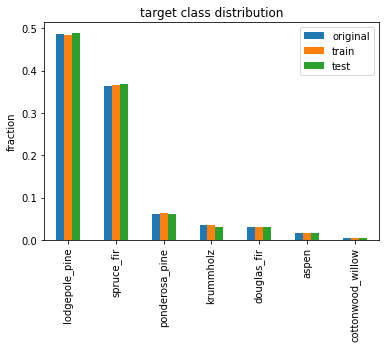

In [22]:
for_plot = ['target_name', 'original', 'train', 'test']
_ = df_target_dist[for_plot].set_index('target_name').plot.bar();
_ = plt.title('target class distribution');
_ = plt.xlabel('')
_ = plt.ylabel('fraction')

# `imbalanced_learn` investigation methods

### dictionary for over sample amounts by target value

In [52]:
temp = {3:1.5, 4:2, 5:3}
for target, factor in temp.items():
    print(target, factor)

3 1.5
4 2
5 3


In [23]:
target_counts = df_data[target_col].value_counts()
target_counts
target_counts.loc[4].values[0]

cover_type
2             283301
1             211840
3              35754
7              20510
6              17367
5               9493
4               2747
dtype: int64

2747

In [24]:
def create_dict_target_count(orig_counts, factors_count):
    dict_target_count = {}
    for index in range(len(factors_count)):
        dict_target_count[index+1] = int(orig_counts.loc[index+1].values[0] * factors_count[index])
    
    list_classes_clean = []
    for index in range(len(factors_count)):
        if factors_count[index] != 1:
            list_classes_clean.append(index+1)
    
    return dict_target_count, list_classes_clean

In [25]:
target_factors = [1, 2, 3, 4, 5, 6, 7]
create_dict_target_count(target_counts, target_factors)

({1: 211840, 2: 566602, 3: 107262, 4: 10988, 5: 47465, 6: 104202, 7: 143570},
 [2, 3, 4, 5, 6, 7])

### method to perform oversampling and cleaning

In [26]:
feature_cols_imbl = feature_cols_to_use

feature_cols_imbl
num_features = len(feature_cols_imbl)
num_features

cat_cols_imbl = [num_features-2, num_features-1]
cat_cols_imbl

target_col

['mms_elevation',
 'mms_aspect',
 'mms_slope',
 'mms_HD_hydrology',
 'mms_VD_hydrology',
 'mms_HD_roadways',
 'mms_hillshade_9am',
 'mms_hillshade_noon',
 'mms_hillshade_3pm',
 'mms_HD_fire_points',
 'wilderness_index',
 'soil_index']

12

[10, 11]

['cover_type']

In [61]:
def over_sample_to_specified_counts(df_data_input, dict_target_counts, do_cleaning=False,
                                    ENN_neighbors=3, ENN_kind='all', ENN_sampling='all'):
    
    smote_nc = SMOTENC(categorical_features=cat_cols_imbl, random_state=59,
                       sampling_strategy=dict_target_counts)
    
    if do_cleaning:
        the_enn   = EditedNearestNeighbours(sampling_strategy=ENN_sampling,
                                            n_neighbors=ENN_neighbors, kind_sel=ENN_kind)
        the_smote = SMOTEENN(random_state=59, smote=smote_nc, enn=the_enn)

    else:
        the_smote = smote_nc
    
    X_smote, y_smote = the_smote.fit_resample(df_data_input[feature_cols_imbl], df_data_input[target_col])
    
    #print(type(X_smote), X_smote.shape)
    #print(type(y_smote), y_smote.shape)
    
    df_smote_nc = pd.concat([X_smote, y_smote], axis=1)
    
    dict_smote_count = Counter(df_smote_nc['cover_type'])
    #print('SMOTE result:')
    #print(new_counts)
    
    sum_target_counts = 0
    for count in dict_target_counts.values():
        sum_target_counts += count
    
    f1 = lambda a, b: (a-b)/a
    dict_cleaned = {}
    #for index in range(len(dict_target_counts)):
    #    dict_cleaned[index+1] = f1(dict_target_counts[index+1], dict_smote_count[index+1])
    for target in dict_target_counts:
        dict_cleaned[target] = f1(dict_target_counts[target], dict_smote_count[target])
    
    
    
    
    print('number samples:')
    print('   total specified target counts = ', sum_target_counts)
    print('   SMOTE result = ', X_smote.shape[0])
    print('   fraction cleaned total = ', f1(sum_target_counts, X_smote.shape[0]))
    print('   fraction cleaned by target = \n   ', dict_cleaned)
        
    #df_smote_nc = pd.concat([X_smote, y_smote], axis=1)
    return df_smote_nc

# try with `df_data_to_use`

### oversample only

In [36]:
target_counts_orig = df_data_to_use[target_col].value_counts()
target_factors = [1, 1, 3, 3, 3, 3, 3]
dict_target_count, list_classes_clean = create_dict_target_count(target_counts_orig, target_factors)
dict_target_count
list_classes_clean

{1: 4759, 2: 6311, 3: 2430, 4: 183, 5: 621, 6: 1194, 7: 1362}

[3, 4, 5, 6, 7]

In [37]:
df_os_no_clean = over_sample_to_specified_counts(df_data_to_use, dict_target_count)

number samples:
   total specified target counts =  16860
   SMOTE result =  16860
   fraction cleaned total =  0.0
   fraction cleaned by target = 
    {1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0}


In [38]:
df_os_no_clean.head()

,mms_elevation,mms_aspect,mms_slope,mms_HD_hydrology,mms_VD_hydrology,mms_HD_roadways,mms_hillshade_9am,mms_hillshade_noon,mms_hillshade_3pm,mms_HD_fire_points,wilderness_index,soil_index,cover_type
0,0.605803,0.288889,0.242424,0.375089,0.156331,0.574680,0.968504,0.854331,0.374016,0.660533,0,29,2
1,0.715858,0.133333,0.181818,0.021475,0.220930,0.307433,0.881890,0.838583,0.472441,0.399136,0,39,7
2,0.635318,0.533333,0.227273,0.471725,0.337209,0.080933,0.858268,0.988189,0.641732,0.248432,2,23,2
3,0.694347,0.997222,0.227273,0.730136,0.520672,0.294787,0.775591,0.834646,0.594488,0.304475,2,24,7
4,0.236118,0.194444,0.363636,0.212598,0.255814,0.130673,0.933071,0.732283,0.263780,0.099819,3,10,3


### oversample and clean

In [39]:
target_counts_orig = df_data_to_use[target_col].value_counts()
target_factors = [1, 1, 3.2, 3.4, 3.4, 3.4, 3.2]
dict_target_count, list_classes_clean = create_dict_target_count(target_counts_orig, target_factors)
dict_target_count, list_classes_clean

({1: 4759, 2: 6311, 3: 2592, 4: 207, 5: 703, 6: 1353, 7: 1452},
 [3, 4, 5, 6, 7])

In [40]:
df_os_clean = over_sample_to_specified_counts(df_data_to_use, dict_target_count, True,
                                              ENN_neighbors=3, ENN_kind='mode', ENN_sampling=list_classes_clean)

number samples:
   total specified target counts =  17377
   SMOTE result =  16842
   fraction cleaned total =  0.030787822984404672
   fraction cleaned by target = 
    {1: 0.0, 2: 0.0, 3: 0.06867283950617284, 4: 0.13526570048309178, 5: 0.14935988620199148, 6: 0.09682187730968218, 7: 0.0640495867768595}


### plot target distributions

,cover_type,original,train,test,target_name,os_no_clean,os_clean
0,2,0.487599,0.4842,0.489667,lodgepole_pine,0.374318,0.374718
1,1,0.364605,0.3656,0.367667,spruce_fir,0.282266,0.282567
2,3,0.061537,0.0629,0.060333,ponderosa_pine,0.144128,0.143332
3,7,0.035300,0.0361,0.031000,krummholz,0.080783,0.080691
4,6,0.029891,0.0308,0.030000,douglas_fir,0.070819,0.072557
5,5,0.016339,0.0159,0.016000,aspen,0.036833,0.035506
6,4,0.004728,0.0045,0.005333,cottonwood_willow,0.010854,0.010628


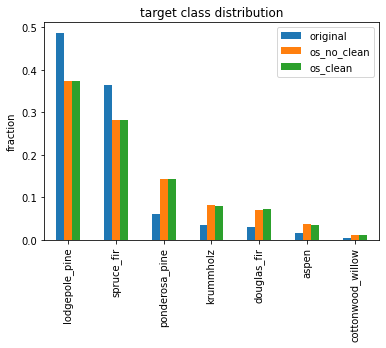

In [41]:
temp_series = df_os_no_clean[target_col].value_counts() / df_os_no_clean.shape[0]
target_dist_os_no_clean = pd.DataFrame(temp_series, columns=['os_no_clean']).reset_index()

temp_series = df_os_clean[target_col].value_counts() / df_os_clean.shape[0]
target_dist_os_clean = pd.DataFrame(temp_series, columns=['os_clean']).reset_index()

df_target_dist_imbl = pd.merge(df_target_dist, target_dist_os_no_clean,
                               how='left', left_on='cover_type', right_on='cover_type')

df_target_dist_imbl = pd.merge(df_target_dist_imbl, target_dist_os_clean,
                               how='left', left_on='cover_type', right_on='cover_type')

df_target_dist_imbl

for_plot = ['target_name', 'original', 'os_no_clean', 'os_clean']
_ = df_target_dist_imbl[for_plot].set_index('target_name').plot.bar();
_ = plt.title('target class distribution');
_ = plt.xlabel('')
_ = plt.ylabel('fraction')

### plot increase factor

,cover_type,original,os_no_clean,os_clean,ratio_os,ratio_os_clean,target_name
0,2,6311,6311,6311,1.0,1.000000,lodgepole_pine
1,1,4759,4759,4759,1.0,1.000000,spruce_fir
2,3,810,2430,2414,3.0,2.980247,ponderosa_pine
3,7,454,1362,1359,3.0,2.993392,krummholz
4,6,398,1194,1222,3.0,3.070352,douglas_fir
5,5,207,621,598,3.0,2.888889,aspen
6,4,61,183,179,3.0,2.934426,cottonwood_willow


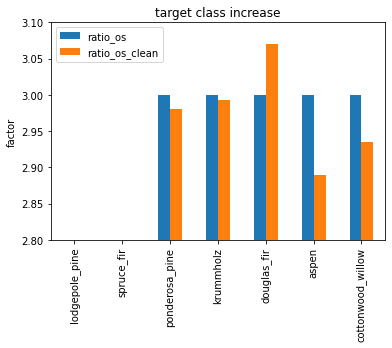

In [42]:
temp_series = df_data_to_use[target_col].value_counts()
target_count_original = pd.DataFrame(temp_series, columns=['original']).reset_index()

temp_series = df_os_no_clean[target_col].value_counts()
target_count_os_no_clean = pd.DataFrame(temp_series, columns=['os_no_clean']).reset_index()

temp_series = df_os_clean[target_col].value_counts()
target_count_os_clean = pd.DataFrame(temp_series, columns=['os_clean']).reset_index()

df_target_count_imbl = pd.merge(target_count_original, target_count_os_no_clean,
                               how='left', left_on='cover_type', right_on='cover_type')

df_target_count_imbl = pd.merge(df_target_count_imbl, target_count_os_clean,
                               how='left', left_on='cover_type', right_on='cover_type')

df_target_count_imbl['ratio_os'] = df_target_count_imbl['os_no_clean'] / df_target_count_imbl['original']
df_target_count_imbl['ratio_os_clean'] = df_target_count_imbl['os_clean'] / df_target_count_imbl['original']

df_target_count_imbl['target_name'] = df_target_count_imbl[target_col[0]].apply(get_target_name_from_integer)

df_target_count_imbl

for_plot = ['target_name', 'ratio_os', 'ratio_os_clean']
_ = df_target_count_imbl[for_plot].set_index('target_name').plot.bar();
_ = plt.title('target class increase');
_ = plt.xlabel('')
_ = plt.ylabel('factor')
_ = plt.ylim(bottom=2.8, top=3.1)

# try with only small classes

In [54]:
df_data_small_classes = df_data_to_use[(df_data_to_use[target_col[0]]!=1) & (df_data_to_use[target_col[0]]!=2)]
df_data_small_classes.head()
target_counts_small_classes = df_data_small_classes[target_col].value_counts()
target_counts_small_classes

,mms_elevation,mms_aspect,mms_slope,mms_HD_hydrology,mms_VD_hydrology,mms_HD_roadways,mms_hillshade_9am,mms_hillshade_noon,mms_hillshade_3pm,mms_HD_fire_points,wilderness_index,soil_index,cover_type
235978,0.715858,0.133333,0.181818,0.021475,0.220930,0.307433,0.881890,0.838583,0.472441,0.399136,0,39,7
471312,0.694347,0.997222,0.227273,0.730136,0.520672,0.294787,0.775591,0.834646,0.594488,0.304475,2,24,7
254885,0.236118,0.194444,0.363636,0.212598,0.255814,0.130673,0.933071,0.732283,0.263780,0.099819,3,10,3
227200,0.169085,0.908333,0.378788,0.128848,0.385013,0.011943,0.594488,0.795276,0.736220,0.069566,3,10,3
576568,0.306153,0.266667,0.348485,0.107373,0.321705,0.106084,0.980315,0.787402,0.263780,0.170640,2,4,3


cover_type
3             810
7             454
6             398
5             207
4              61
dtype: int64

In [55]:
def create_dict_target_count_new(orig_counts, dict_factors):
    dict_target_count = {}
    list_classes_clean = []
    
    for target, factor in dict_factors.items():
        dict_target_count[target] = int(orig_counts.loc[target].values[0] * factor)
        
        if factor != 1:
            list_classes_clean.append(target)
    
    return dict_target_count, list_classes_clean

In [59]:
dict_factors = {3:3, 4:3, 5:3, 6:3, 7:3}
dict_target_count, list_classes_clean = create_dict_target_count_new(target_counts_small_classes, dict_factors)
dict_target_count
list_classes_clean

{3: 2430, 4: 183, 5: 621, 6: 1194, 7: 1362}

[3, 4, 5, 6, 7]

In [62]:
df_only = over_sample_to_specified_counts(df_data_small_classes, dict_target_count)

C:\Users\LoriN\anaconda3\envs\p3_7_pycaret\lib\site-packages\imblearn\utils\_validation.py:326: UserWarning: After over-sampling, the number of samples (2430) in class 3 will be larger than the number of samples in the majority class (class #3 -> 810)
  n_samples_majority,
C:\Users\LoriN\anaconda3\envs\p3_7_pycaret\lib\site-packages\imblearn\utils\_validation.py:326: UserWarning: After over-sampling, the number of samples (1194) in class 6 will be larger than the number of samples in the majority class (class #3 -> 810)
  n_samples_majority,
C:\Users\LoriN\anaconda3\envs\p3_7_pycaret\lib\site-packages\imblearn\utils\_validation.py:326: UserWarning: After over-sampling, the number of samples (1362) in class 7 will be larger than the number of samples in the majority class (class #3 -> 810)
  n_samples_majority,


number samples:
   total specified target counts =  5790
   SMOTE result =  5790
   fraction cleaned total =  0.0
   fraction cleaned by target = 
    {3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0}


In [63]:
df_only.head()

,mms_elevation,mms_aspect,mms_slope,mms_HD_hydrology,mms_VD_hydrology,mms_HD_roadways,mms_hillshade_9am,mms_hillshade_noon,mms_hillshade_3pm,mms_HD_fire_points,wilderness_index,soil_index,cover_type
0,0.715858,0.133333,0.181818,0.021475,0.220930,0.307433,0.881890,0.838583,0.472441,0.399136,0,39,7
1,0.694347,0.997222,0.227273,0.730136,0.520672,0.294787,0.775591,0.834646,0.594488,0.304475,2,24,7
2,0.236118,0.194444,0.363636,0.212598,0.255814,0.130673,0.933071,0.732283,0.263780,0.099819,3,10,3
3,0.169085,0.908333,0.378788,0.128848,0.385013,0.011943,0.594488,0.795276,0.736220,0.069566,3,10,3
4,0.306153,0.266667,0.348485,0.107373,0.321705,0.106084,0.980315,0.787402,0.263780,0.170640,2,4,3


In [64]:
df_only_clean = over_sample_to_specified_counts(df_data_small_classes, dict_target_count, True,
                                                ENN_neighbors=3, ENN_kind='mode', ENN_sampling=list_classes_clean)

C:\Users\LoriN\anaconda3\envs\p3_7_pycaret\lib\site-packages\imblearn\utils\_validation.py:326: UserWarning: After over-sampling, the number of samples (2430) in class 3 will be larger than the number of samples in the majority class (class #3 -> 810)
  n_samples_majority,
C:\Users\LoriN\anaconda3\envs\p3_7_pycaret\lib\site-packages\imblearn\utils\_validation.py:326: UserWarning: After over-sampling, the number of samples (1194) in class 6 will be larger than the number of samples in the majority class (class #3 -> 810)
  n_samples_majority,
C:\Users\LoriN\anaconda3\envs\p3_7_pycaret\lib\site-packages\imblearn\utils\_validation.py:326: UserWarning: After over-sampling, the number of samples (1362) in class 7 will be larger than the number of samples in the majority class (class #3 -> 810)
  n_samples_majority,


number samples:
   total specified target counts =  5790
   SMOTE result =  5475
   fraction cleaned total =  0.054404145077720206
   fraction cleaned by target = 
    {3: 0.05185185185185185, 4: 0.16393442622950818, 5: 0.061191626409017714, 6: 0.09380234505862646, 7: 0.006607929515418502}
